In [ ]:
import pandas as pd
import numpy as np

ap_score_dist = pd.read_csv(
    '/Users/alyssagong/Desktop/CollegeBoard_Data/ap_score_distributions.csv',
    skiprows=4,
    header=None
)

#name columns
ap_score_dist.columns = [
    'Year',
    'n5', 'p5',
    'n4', 'p4',
    'n3', 'p3',
    'n2', 'p2',
    'n1', 'p1',
    'mean',
    'extra'
]
ap_score_dist = ap_score_dist.drop(columns=['extra'])



In [49]:
# convert year to int
ap_score_dist[ap_score_dist['Year'].isna()]
ap_score_dist = ap_score_dist.dropna(subset=['Year'])

ap_score_dist['Year'] = ap_score_dist['Year'].astype(int)

# convert columns to ints
ap_score_dist['n5'] = ap_score_dist['n5'].astype(str).str.replace(',', '')
ap_score_dist['n5'] = ap_score_dist['n5'].astype(float).astype(int)

ap_score_dist['n4'] = ap_score_dist['n4'].astype(str).str.replace(',', '')
ap_score_dist['n4'] = ap_score_dist['n4'].astype(float).astype(int)

ap_score_dist['n3'] = ap_score_dist['n3'].astype(str).str.replace(',', '')
ap_score_dist['n3'] = ap_score_dist['n3'].astype(float).astype(int)

ap_score_dist['n2'] = ap_score_dist['n2'].astype(str).str.replace(',', '')
ap_score_dist['n2'] = ap_score_dist['n2'].astype(float).astype(int)

ap_score_dist['n1'] = ap_score_dist['n1'].astype(str).str.replace(',', '')
ap_score_dist['n1'] = ap_score_dist['n1'].astype(float).astype(int)

ap_score_dist['mean'] = ap_score_dist['mean'].astype(float)


In [52]:
#percent scoring 3+
ap_score_dist['pct_3_plus'] = ap_score_dist['p3'] + ap_score_dist['p4'] + ap_score_dist['p5']


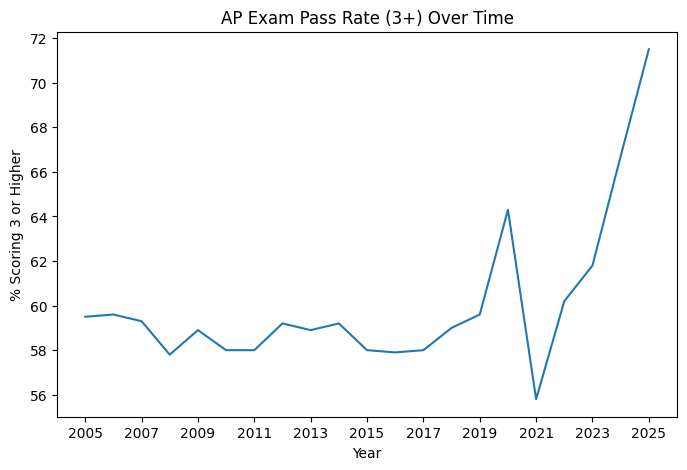

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(ap_score_dist['Year'], ap_score_dist['pct_3_plus'])

plt.xlabel('Year')
plt.ylabel('% Scoring 3 or Higher')
plt.title('AP Exam Pass Rate (3+) Over Time')

plt.xticks(ap_score_dist['Year'][::2])
plt.show()


In [91]:
ap_participation = pd.read_csv(
    '/Users/alyssagong/Desktop/CollegeBoard_Data/ap_participation.csv',
    skiprows=4,
    header=None
)

ap_participation_data = ap_participation.iloc[::2].reset_index(drop=True)
ap_students = ap_participation_data[[0, 3]].copy()
ap_students.columns = ['Year', 'Students']

ap_students['Students'] = (ap_students['Students'].astype(str).str.replace(',', ''))
ap_students = ap_students[ap_students['Students'] != 'nan']
ap_students['Students'] = ap_students['Students'].astype(int)
ap_students.dtypes


Year        object
Students     int64
dtype: object

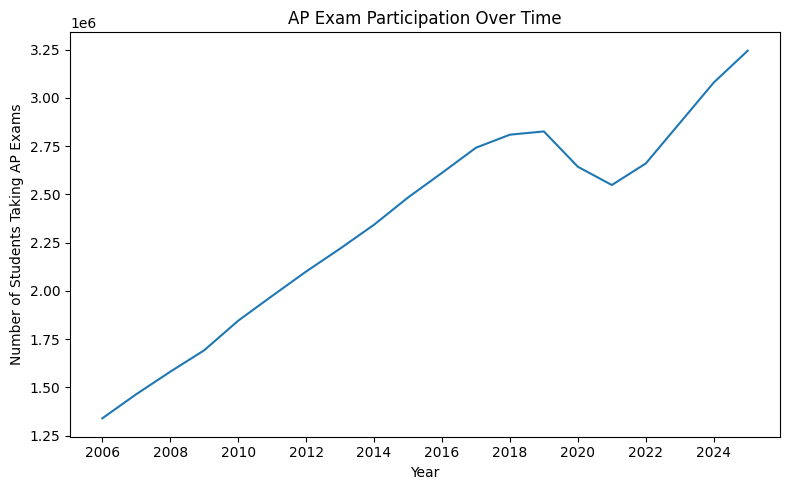

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(ap_students['Year'], ap_students['Students'])

plt.xlabel('Year')
plt.ylabel('Number of Students Taking AP Exams')
plt.title('AP Exam Participation Over Time')

plt.xticks(ap_students['Year'][::2])
plt.tight_layout()
plt.show()

